In [263]:
# Libraries
import sys
print sys.version
print sys.version_info

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

2.7.12 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]
sys.version_info(major=2, minor=7, micro=12, releaselevel='final', serial=0)


## Data Import

In [264]:
dat_knn = pd.read_excel('dat_knn_2.xlsx')

In [265]:
dat_knn[['run_dist', 'difficulty', 'is_workout']].head()

,run_dist,difficulty,is_workout
171,10.0,3,1
225,10.0,1,1
226,8.0,2,0
227,11.0,4,1
228,8.0,3,0


## kNN Models

In [266]:
# Preliminary models
train, test = train_test_split(dat_knn, test_size = 0.3)

neighbors_run = KNN(n_neighbors=25)
neighbors_run.fit(train[['run_dist', 'difficulty', 'is_workout']], train['run_dist_1'])
y_pred_run = neighbors_run.predict(test[['run_dist', 'difficulty', 'is_workout']])
r_run = neighbors_run.score(test[['run_dist', 'difficulty', 'is_workout']], test['run_dist_1'])

neighbors_work = KNN(n_neighbors=10)
neighbors_work.fit(train[['run_dist', 'difficulty', 'is_workout']], train['is_workout_1'])
y_pred_work = neighbors_work.predict(test[['run_dist', 'difficulty', 'is_workout']])
y_pred_work_bin = pd.Series(y_pred_work_w).map(round).values

#r_work = neighbors_work.score(test[['run_dist', 'difficulty', 'is_workout']], test['is_workout_1'])

In [269]:
print 'Run distance R^2:', str(round(r_run,3))
#print(r_work)

print 'Workout accuracy:', str(sum(y_pred_work_bin == test['is_workout_1'])/float(len(test['is_workout_1'])))

Run distance R^2: 0.102
Workout accuracy: 0.694256756757


In [105]:
# Tuning for unweighted vs. weighted and optimal k
avg_rsq_weight = [None]*150
avg_rsq_unweight = [None]*150
for k in range(150):
    rsq_weight = [None]*20
    rsq_unweight = [None]*20
    for i in range(20):
        train, test = train_test_split(dat_knn, test_size = 0.3)
        # Unweighted
        neighbors_run_un = KNN(n_neighbors=k+1)
        neighbors_run_un.fit(train[['run_dist', 'difficulty', 'is_workout']], train['run_dist_1'])
        y_pred_run_un = neighbors_run_un.predict(test[['run_dist', 'difficulty', 'is_workout']])
        r_run_un = neighbors_run_un.score(test[['run_dist', 'difficulty', 'is_workout']], test['run_dist_1'])
        rsq_unweight[i] = r_run_un
        # Weighted
        neighbors_run_w = KNN(n_neighbors=k+1, weights='distance')
        neighbors_run_w.fit(train[['run_dist', 'difficulty', 'is_workout']], train['run_dist_1'])
        y_pred_run_w = neighbors_run_w.predict(test[['run_dist', 'difficulty', 'is_workout']])
        r_run_w = neighbors_run_w.score(test[['run_dist', 'difficulty', 'is_workout']], test['run_dist_1'])
        rsq_weight[i] = r_run_w
    avg_rsq_weight[k] = float(sum(rsq_weight))/len(rsq_weight)
    avg_rsq_unweight[k] = float(sum(rsq_unweight))/len(rsq_unweight)

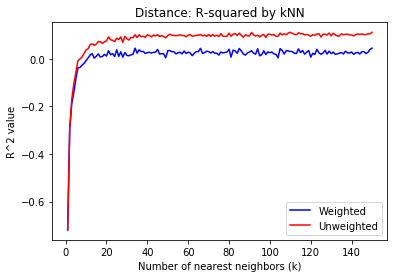

In [109]:
# Plot optimal k
plt.plot(range(1,151), avg_rsq_weight, c='b', label='Weighted')
plt.plot(range(1,151), avg_rsq_unweight, c='r', label='Unweighted')
plt.title('Distance: R-squared by kNN')
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('R^2 value')
plt.legend(['Weighted', 'Unweighted'])
plt.show()

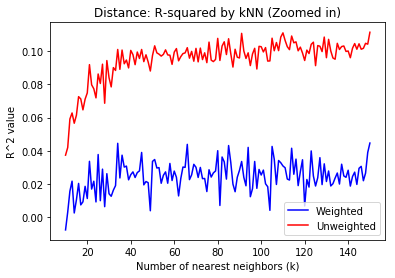

In [110]:
# Zoomed in plot
plt.plot(range(10,151), avg_rsq_weight[9:], c='b')
plt.plot(range(10,151), avg_rsq_unweight[9:], c='r')
plt.title('Distance: R-squared by kNN (Zoomed in)')
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('R^2 value')
plt.legend(['Weighted', 'Unweighted'])
plt.show()

In [270]:
# Best k: 25
print 'R^2 for k=25:', str(avg_rsq_unweight[25])

R^2 for k=25: 0.0805419769803


In [271]:
# Look at predictions vs. truth for distance run
train, test = train_test_split(dat_knn, test_size = 0.3)
neighbors_run_un = KNN(n_neighbors=25)
neighbors_run_un.fit(train[['run_dist', 'difficulty', 'is_workout']], train['run_dist_1'])
y_pred_run_un = neighbors_run_un.predict(test[['run_dist', 'difficulty', 'is_workout']])

In [272]:
# Representative snippet--for paper
pd.DataFrame({'True':test['run_dist_1'].round(1), 'Prediction':y_pred_run_un.round(1)}).iloc[40:50]

,Prediction,True
425,7.8,6.0
167,7.9,0.0
256,6.9,6.0
197,6.8,10.0
206,7.8,14.0
220,6.4,8.0
160,7.1,4.0
322,6.1,8.0
176,6.6,6.0
151,7.7,12.0


In [77]:
# Cross validation for kNN workouts
avg_rsq_weight = [None]*50
avg_rsq_unweight = [None]*50
avg_acc_weight = [None]*50
avg_acc_unweight = [None]*50
for k in range(50):
    rsq_weight = [None]*20
    rsq_unweight = [None]*20
    acc_weight = [None]*20
    acc_unweight = [None]*20
    for i in range(20):
        train, test = train_test_split(dat_knn, test_size = 0.3)
        # Unweighted
        neighbors_work_un = KNN(n_neighbors=k+1)
        neighbors_work_un.fit(train[['run_dist', 'difficulty', 'is_workout']], train['is_workout_1'])
        y_pred_work_un = neighbors_work_un.predict(test[['run_dist', 'difficulty', 'is_workout']])
        r_work_un = neighbors_work_un.score(test[['run_dist', 'difficulty', 'is_workout']], test['is_workout_1'])
        rsq_unweight[i] = r_work_un
        acc_unweight[i] = float(sum(pd.Series(test['is_workout_1']).values == pd.Series(y_pred_work_un).map(round).values))/len(y_pred_work_un)
        # Weighted
        neighbors_work_w = KNN(n_neighbors=k+1, weights='distance')
        neighbors_work_w.fit(train[['run_dist', 'difficulty', 'is_workout']], train['is_workout_1'])
        y_pred_work_w = neighbors_work_w.predict(test[['run_dist', 'difficulty', 'is_workout']])
        r_work_w = neighbors_work_w.score(test[['run_dist', 'difficulty', 'is_workout']], test['is_workout_1'])
        rsq_weight[i] = r_work_w
        acc_weight[i] = float(sum(pd.Series(test['is_workout_1']).values == pd.Series(y_pred_work_w).map(round).values))/len(y_pred_work_w)
    avg_rsq_weight[k] = float(sum(rsq_weight))/len(rsq_weight)
    avg_rsq_unweight[k] = float(sum(rsq_unweight))/len(rsq_unweight)
    avg_acc_weight[k] = float(sum(acc_weight))/len(acc_weight)
    avg_acc_unweight[k] = float(sum(acc_unweight))/len(acc_unweight)

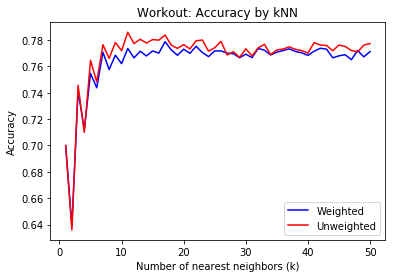

In [100]:
# Find optimal k
plt.plot(range(1,51), avg_acc_weight, c='b', label='Weighted')
plt.plot(range(1,51), avg_acc_unweight, c='r', label='Unweighted')
plt.title('Workout: Accuracy by kNN')
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('Accuracy')
plt.legend(['Weighted', 'Unweighted'])
plt.show()

In [273]:
# Best accuracy is k=10
print 'Accuracy for k=10:', str(avg_acc_unweight[10])

Accuracy for k=10: 0.78597972973


In [277]:
# Results dataframe--all data plus predictions
results = pd.DataFrame({'run_dist':test['run_dist'], 'difficulty':test['difficulty'], 
                        'is_workout':test['is_workout'], 'run_dist_1':test['run_dist_1'], 
                        'run_dist_predict':y_pred_run, 'is_workout_1':test['is_workout_1'], 
                        'workout_pred':y_pred_work_bin}) 

In [278]:
# Confusion matrix
cmat = confusion_matrix(results['is_workout_1'], results['workout_pred'])

In [279]:
cmat

array([[415,  58],
       [105,  14]])

In [280]:
print '# no workouts:', str(len(results['is_workout_1']) - sum(results['is_workout_1']))
print '# workouts:', str(sum(results['is_workout_1']))

# no workouts: 473
# workouts: 119


In [281]:
# Classification breakdown
true_neg = cmat[0][0]
false_pos = cmat[0][1]
false_neg = cmat[1][0]
true_pos = cmat[1][1]

print true_neg, false_pos, true_pos, false_neg

415 58 14 105


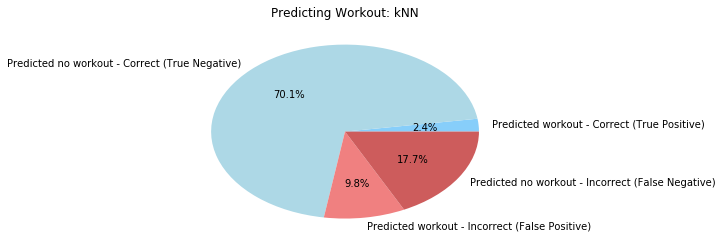

In [282]:
# Pie chart for classifications
labels = ['Predicted workout - Correct (True Positive)','Predicted no workout - Correct (True Negative)',
          'Predicted workout - Incorrect (False Positive)', 
         'Predicted no workout - Incorrect (False Negative)']
plt.title('Predicting Workout: kNN')
plt.pie([true_pos, true_neg, false_pos, false_neg], colors=['lightskyblue','lightblue','lightcoral','indianred'], 
        labels=labels,
       autopct='%1.1f%%')
plt.show()

### Try Logistic Regression

In [283]:
# Quick test on logistic regression--worthwhile if there are much better results, not worth it if not

In [284]:
from sklearn.linear_model import LogisticRegression

In [285]:
train, test = train_test_split(dat_knn, test_size = 0.3)
log_reg = LogisticRegression()
log_reg.fit(train[['run_dist', 'difficulty', 'is_workout']], pd.Series(train['is_workout_1']))
preds = log_reg.predict(test[['run_dist', 'difficulty', 'is_workout']])

In [286]:
float(sum(preds == test['is_workout_1']))/len(preds)

0.7820945945945946

In [287]:
# not worth exploring further given the scope of the project

# Final Model

In [288]:
# Final trained models just to make a function where you can input mileage and text and get your plan for tomorrow

In [289]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [290]:
dat_small = pd.read_excel('rd_small_full.xlsx')

In [304]:
# Train naive bayes models
X_train_diff, X_test_diff, y_train_diff, y_test_diff = train_test_split(dat_small['notes'], dat_small['difficulty'], test_size=0.3)
X_train_work, X_test_work, y_train_work, y_test_work = train_test_split(dat_small['notes'], dat_small['is_workout'], test_size=0.3)

nb_model_diff = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), 
                    ('clf', MultinomialNB()),])
nb_model_work = Pipeline([('vect', CountVectorizer(ngram_range=(1,1))), ('clf', MultinomialNB()),])
nb_model_diff.fit(X_train_diff, y_train_diff)
nb_model_work.fit(X_train_work, y_train_work)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [292]:
dat_knn = pd.read_excel('dat_knn_2.xlsx')

In [305]:
# Train kNN models
train, test = train_test_split(dat_knn, test_size = 0.3)

neighbors_run = KNN(n_neighbors=25)
neighbors_run.fit(train[['run_dist', 'difficulty', 'is_workout']], train['run_dist_1'])

neighbors_work = KNN(n_neighbors=10)
neighbors_work.fit(train[['run_dist', 'difficulty', 'is_workout']], train['is_workout_1'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [306]:
# Test
neighbors_run.predict(pd.DataFrame({'run':[8],'diff':[3],'workout':[0]}))[0]

4.8879999999999999

In [307]:
# Function
def recommend_next_day(mileage, text):
    difficulty = nb_model_diff.predict([text])
    workout = nb_model_work.predict([text])
    run_rec = neighbors_run.predict(pd.DataFrame({'run':[mileage],'diff':[difficulty],'workout':[workout]}))
    work_rec = neighbors_work.predict(pd.DataFrame({'run':[mileage],'diff':[difficulty],'workout':[workout]}))
    print 'You should run ' + str(round(run_rec[0],1)) + ' miles.'
    if round(work_rec[0]) == 1:
        print 'You should do a workout.'
    else:
        print 'You should not do a workout.'
    return round(run_rec[0],1), round(work_rec[0])


In [308]:
recommend_next_day(10, 'I felt so bad I thought I would die. What a terrible run')

You should run 5.1 miles.
You should not do a workout.


(5.1, 0.0)

In [309]:
recommend_next_day(1, 'Felt unbelievable, the 400s were so easy')

You should run 6.1 miles.
You should not do a workout.


(6.1, 0.0)

In [313]:
recommend_next_day(12, '6 miles easy. Did the bridge and felt pretty smooth. 4x100 strides after')

You should run 3.3 miles.
You should not do a workout.


(3.3, 0.0)